Iris species are categorised into three; setosa, versicolor or virginia, according to the length and width of the petals and sepals. The goal is to build a machine learning model that can idetify the species.

In [1]:
from sklearn.datasets import load_iris 
iris_dataset = load_iris()

This dataset is already in the scikit-learn dataset module.

In [2]:
type(iris_dataset) #This is a Bunch object which is very similar to a dictionary it contains keys and values

sklearn.utils.Bunch

In [3]:
print("Keys of iris_dataset \n{}".format(iris_dataset.keys()))

Keys of iris_dataset 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("First 5 coulumb in data: \n {}" .format(iris_dataset['data'][:5]))
print(type(iris_dataset['data']))
print(iris_dataset['data'].shape) 
print("As you can see there are 150 flowers")

First 5 coulumb in data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
<class 'numpy.ndarray'>
(150, 4)
As you can see there are 150 flowers


In [7]:
print("Target: \n{}".format(iris_dataset['target']))

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Each categorie mach with a number. 0 = setosa, 1 = versicolor, 2 = virginica

In [8]:
#I like to split my datas into there section train,test and validation
#First two entry is data,X and y,next values are the percentages.
#Ex: Data_Splitter(iris_dataset['data'],iris_dataset['target'],70,20,10)
def Data_Splitter(data_x,data_y,train_per,test_per,validation_per):
        keep_per=test_per+validation_per
        from sklearn.model_selection import train_test_split
        X_train, X_keep, y_train, y_keep = train_test_split(data_x,
                                                            data_y,
                                                            train_size=train_per/100,
                                                            test_size=keep_per/100,
                                                            random_state=0
                                                           )
        valtest=keep_per
        tes_size=(test_per/valtest)
        val_size=(validation_per/valtest)
        X_test, X_val, y_test, y_val = train_test_split(X_keep,
                                                        y_keep,
                                                        train_size=round(tes_size,1),
                                                        test_size=round(val_size,1),
                                                        random_state=0
                                                       )

        print("Train set shape:\nX{}".format(X_train.shape))
        print("y{}".format(y_train.shape))
        print(round(len(y_train)/len(iris_dataset['target']),1)*100,"%")

        print("Test set shape:\nX{}".format(X_test.shape))
        print("y{}".format(y_test.shape))
        print(round(len(y_test)/len(iris_dataset['target']),1)*100,"%")

        print("Validation set shape:\nX{}".format(X_val.shape))
        print("y:{}".format(y_val.shape))
        print(round(len(y_val)/len(iris_dataset['target']),1)*100,"%")
        return X_train, y_train, X_test, y_test, X_val ,y_val

In [9]:
X_train, y_train, X_test, y_test, X_val ,y_val=Data_Splitter(iris_dataset['data'],iris_dataset['target'],70,20,10)

Train set shape:
X(105, 4)
y(105,)
70.0 %
Test set shape:
X(31, 4)
y(31,)
20.0 %
Validation set shape:
X(14, 4)
y:(14,)
10.0 %


In [10]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)
#creating a dataframe

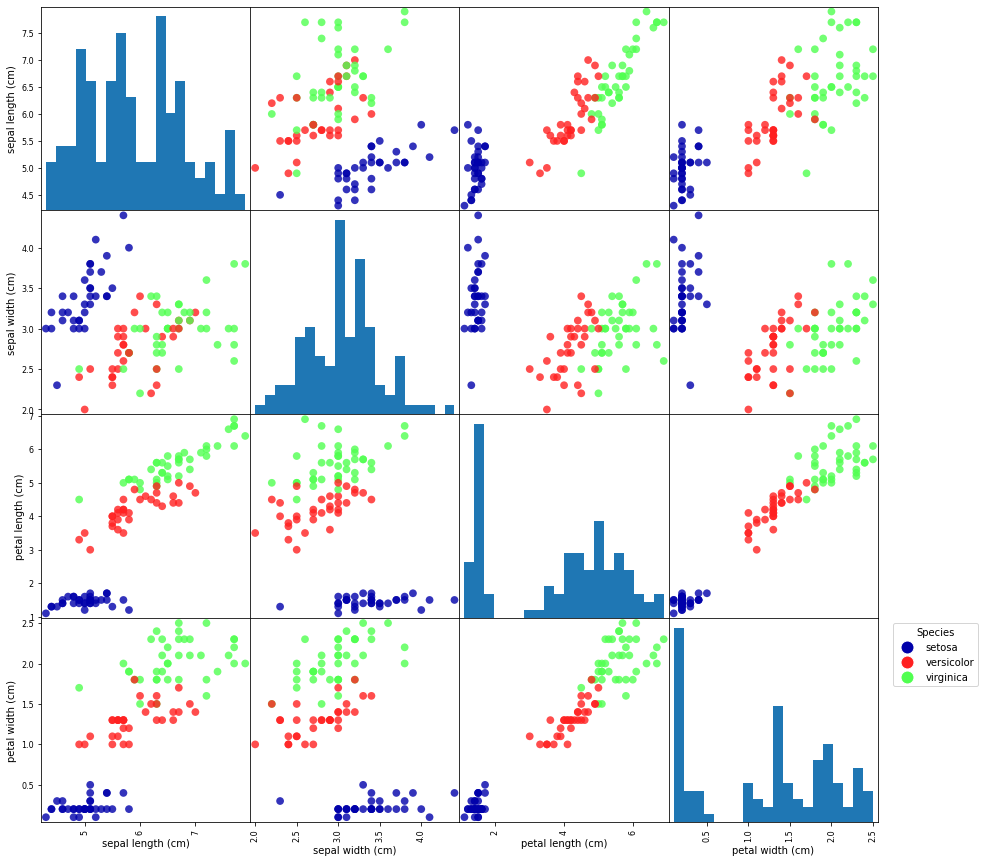

In [11]:
import mglearn
import matplotlib.pyplot as plt
scatter_matrix = pd.plotting.scatter_matrix( iris_dataframe,
                                            c=y_train, #The color of points is determined by the values of y_train
                                            figsize=(15, 15), 
                                            marker='o', 
                                            hist_kwds={'bins': 20}, #keyword arguments for histogram. Each hist will have 20bins
                                            s=60, #size of the points is 60
                                            alpha=0.8, #opacity is 80%
                                            cmap=mglearn.cm3  #Sets the color map for the points.Using a color map from the mglearn
                                           )
colors = {'setosa': 0, 'versicolor': 1, 'virginica': 2} 

labels = list(colors.keys()) 
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=mglearn.cm3(i/2), markersize=13, label=label) 
           for i, label in enumerate(labels)] 
plt.legend(handles=handles, title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Plots illustrates that three species are seperated well.

Any classification algorithm can be used here. I will use a k-nearest neighbors classifier. K-nearest neighbors algorithm group the data. whenever a new data is given it makes prediction based on closest group. The k defines the k number of neighbors will be checked. The algorith check closest k neighbor and make prediction using majority class among these neigbors.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) #k=1

In [13]:
knn.fit(X_train,y_train)
#fit method of an knn object will build a model. 
#It takes Numpy arrat as arguments!

KNeighborsClassifier(n_neighbors=1)

Model is completed we can make prediction now.

In [14]:
print(X_test[5])
print(y_test[5])

[6.8 3.  5.5 2.1]
2


In [15]:
prediction= knn.predict([X_test[5]]) #predict method of knn object is used to make a prediction
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


## Evaluating the model 
The model is created but how well it works must be tested. That's why we seperated the dataset into there section. The train dataset helped with teaching model. Now test data set will be used to test correcness of the model. If we are not satisfied we could use that test dataset again by changing some parameters of model. That's why I keep validation method because multiple use of test set can make model learn these values as well. Therefore after enought try with the model. Last test can be done with the validation dataset.

In [16]:
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))
#all test dataset will be predicted.

Test set predictions: 
 [0 0 0 0 1 2 1 1 2 1 0 1 1 1 2 1 0 1 2 2 0 0 0 1 0 1 1 2 2 2 0]


In [19]:
import numpy as np
print("Test set score {:.2f}".format(np.mean(y_pred==y_test)))

Test set score 1.00


In [20]:
print("Test set score {:.2f}".format(knn.score(X_test,y_test)))

Test set score 1.00


In [24]:
print(X_val[12])
print(y_val[12])

[4.7 3.2 1.3 0.2]
0


In [25]:
prediction= knn.predict([X_val[12]]) #predict method of knn object is used to make a prediction
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']
